<a href="https://colab.research.google.com/github/theNewtonCode/Attendify/blob/main/attendify_2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from keras import applications

In [7]:
from numpy import expand_dims

In [6]:
from tensorflow.keras.applications.resnet_v2 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16

In [2]:
pip install mtcnn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 30.3 MB/s eta 0:00:00


In [8]:
from matplotlib import pyplot as plt
from mtcnn.mtcnn import MTCNN

In [9]:
image = plt.imread('exp1.jpg')

In [10]:
detector = MTCNN()

faces = detector.detect_faces(image)
for face in faces:
  print(face)

2/2 [==============================] - 0s 56ms/step
{'box': [1096, 341, 81, 110], 'confidence': 0.9999992251396179, 'keypoints': {'left_eye': (1115, 384), 'right_eye': (1152, 387), 'nose': (1125, 405), 'mouth_left': (1111, 422), 'mouth_right': (1145, 425)}}
{'box': [719, 192, 59, 73], 'confidence': 0.999914824962616, 'keypoints': {'left_eye': (735, 220), 'right_eye': (763, 216), 'nose': (751, 234), 'mouth_left': (742, 248), 'mouth_right': (764, 245)}}
{'box': [939, 212, 65, 83], 'confidence': 0.9996115565299988, 'keypoints': {'left_eye': (953, 245), 'right_eye': (982, 241), 'nose': (965, 264), 'mouth_left': (956, 276), 'mouth_right': (982, 274)}}
{'box': [451, 278, 78, 89], 'confidence': 0.9991018772125244, 'keypoints': {'left_eye': (474, 316), 'right_eye': (509, 311), 'nose': (499, 332), 'mouth_left': (483, 349), 'mouth_right': (514, 344)}}
{'box': [1263, 585, 146, 178], 'confidence': 0.9908865094184875, 'keypoints': {'left_eye': (1298, 637), 'right_eye': (1352, 669), 'nose': (1296, 6

In [11]:
from matplotlib.patches import Rectangle

In [12]:
def highlight_faces(image_path, faces):
  # display image
  image = plt.imread(image_path)
  plt.imshow(image)

  ax = plt.gca()

  # for each face, draw a rectangle based on coordinates
  for face in faces:
    x, y, width, height = face['box']
    face_border = Rectangle((x, y), width, height,
                          fill=False, color='red')
    ax.add_patch(face_border)
  plt.show()

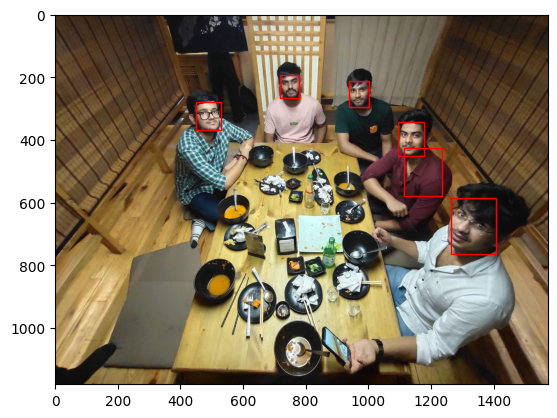

In [14]:
highlight_faces('exp1.jpg', faces)

2/2 [==============================] - 0s 34ms/step


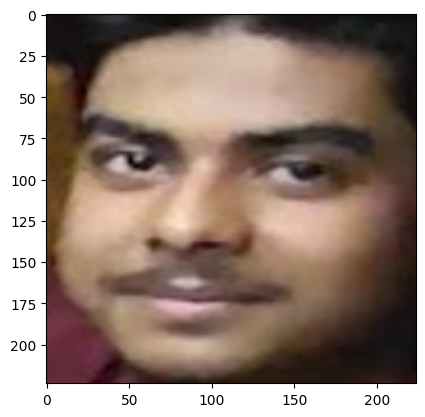

In [16]:
from numpy import asarray
from PIL import Image

def extract_face_from_image(image_path, required_size=(224, 224)):
  # load image and detect faces
  image = plt.imread(image_path)
  detector = MTCNN()
  faces = detector.detect_faces(image)

  face_images = []

  for face in faces:
    # extract the bounding box from the requested face
    x1, y1, width, height = face['box']
    x2, y2 = x1 + width, y1 + height

    # extract the face
    face_boundary = image[y1:y2, x1:x2]

    # resize pixels to the model size
    face_image = Image.fromarray(face_boundary)
    face_image = face_image.resize(required_size)
    face_array = asarray(face_image)
    face_images.append(face_array)

  return face_images

extracted_face = extract_face_from_image('exp1.jpg')

plt.imshow(extracted_face[0])
plt.show()

In [18]:
import cv2

In [19]:
j = 0
for i in extracted_face:
  image = cv2.cvtColor(i, cv2.COLOR_RGB2BGR)
  j = j+1
  cv2.imwrite(f'face{j}.jpg', image)

In [21]:
import numpy as np
from keras.models import Model
from sklearn.metrics.pairwise import cosine_similarity

In [69]:
def load_vgg16_model():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3), pooling='avg')
    model = Model(inputs=base_model.input, outputs=base_model.output)
    return model

# Preprocess an image for prediction
def preprocess_image(img, ifyes):
  if (ifyes ==True):
    img = cv2.fastNlMeansDenoisingColored(img, None, 10, 10, 7, 15)
  img = np.expand_dims(img, axis=0)
  img = preprocess_input(img)
  # print("this is printed", img.shape)
  return img



# Get embeddings for a list of images using the VGG16 model
def get_embeddings(images, model, ifyes):
    embeddings = []
    for img in images:
        embeddings.append(model.predict(preprocess_image(img, ifyes))[0])
    return np.array(embeddings)

# Calculate cosine similarity between two sets of embeddings
def calculate_similarity(embeddings1, embeddings2):
    similarities = cosine_similarity(embeddings1, embeddings2)
    return similarities

# Define a threshold for similarity
threshold = 0.7  # Adjust this value as needed

# Extract faces from images using the extract_face_from_image function
list1_faces = extract_face_from_image('face4.jpg')
list2_faces = extract_face_from_image('g1.jpg')
# img = image.load_img('iamge.png')
# list2_faces = [image.img_to_array(img)]

# Load the VGG16 model
model = load_vgg16_model()

# # Get embeddings for faces in list 1 and list 2
list1_embeddings = get_embeddings(list1_faces, model, False)
list2_embeddings = get_embeddings(list2_faces, model, False)





1/1 [==============================] - 1s 908ms/step


In [70]:
similarities = calculate_similarity(list1_embeddings, list2_embeddings)

# Check if faces in list 1 are present in list 2
for i, sim_values in enumerate(similarities):
    for j, similarity in enumerate(sim_values):
        if similarity > 0.98:
          # print('Present')
          # break
          print(similarity)
          print(f"Face {i+1} in list 1 is similar to Face {j+1} in list 2")


0.9836904
Face 1 in list 1 is similar to Face 17 in list 2


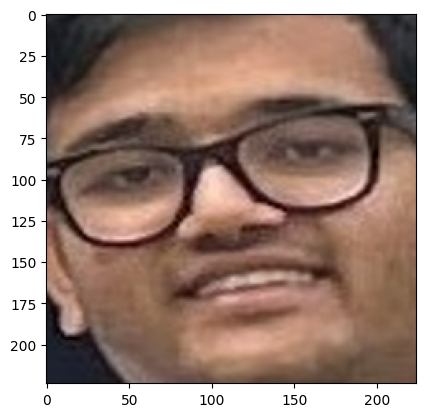

In [71]:

plt.imshow(list2_faces[16])
plt.show()

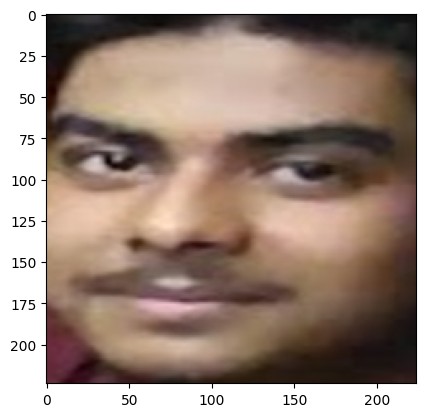

In [67]:
plt.imshow(list1_faces[0])
plt.show()